In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [5]:
# Load Titanic dataset
df = pd.read_csv('/content/train.csv')

df['age'] = df['age'].astype('object')
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['trestbps'] = df['trestbps'].astype('object')
df['chol'] = df['chol'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['thalach'] = df['thalach'].astype('object')
df['exang'] = df['exang'].astype('object')
df['oldpeak'] = df['oldpeak'].astype('object')
df['slope'] = df['slope'].astype('object')
df['cs'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df['target']= df['target'].astype('object')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target, cs]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1025 non-null   object
 1   sex       1025 non-null   object
 2   cp        1025 non-null   object
 3   trestbps  1025 non-null   object
 4   chol      1025 non-null   object
 5   fbs       1025 non-null   object
 6   restecg   1025 non-null   object
 7   thalach   1025 non-null   object
 8   exang     1025 non-null   object
 9   oldpeak   1025 non-null   object
 10  slope     1025 non-null   object
 11  ca        1025 non-null   int64 
 12  thal      1025 non-null   object
 13  target    1025 non-null   object
 14  cs        1025 non-null   object
dtypes: int64(1), object(14)
memory usage: 120.2+ KB


In [6]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ca      1025 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1025 non-null   object
 1   sex       1025 non-null   object
 2   cp        1025 non-null   object
 3   trestbps  1025 non-null   object
 4   chol      1025 non-null   object
 5   fbs       1025 non-null   object
 6   restecg   1025 non-null   object
 7   thalach   1025 non-null   object
 8   exang     1025 non-null   object
 9   oldpeak   1025 non-null   object
 10  slope     1025 non-null   object
 11  thal      1025 non-null   object
 12  target    1025 non-null   object
 13  cs        1025 non-null   object
dtypes: object(14)
memory usage: 112

target_1
True     526
False    499
Name: count, dtype: int64


age_34  age_35  age_37  age_38  age_39  age_40  age_41  age_42  age_43  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   age_44  ...  slope_1  slope_2  thal_1  thal_2  thal_3  target_1   cs_1  \
0   False  ...    False     True   False   False    True     False  False   
1   False  ...    False    False   False   False    True     False  False   
2   False  ...    False    False   False   False    True     False  False   
3   False  ...    False     True   False   False    True     False   True   
4   False  ...     True    False   False    True   False     False  False   

    cs_2   cs_3   cs_4  
0   True  False  False  
1  False  False  False  
2  False  False  False  
3  False  False  False  
4  False   True  False  

[5 rows x 386 columns]

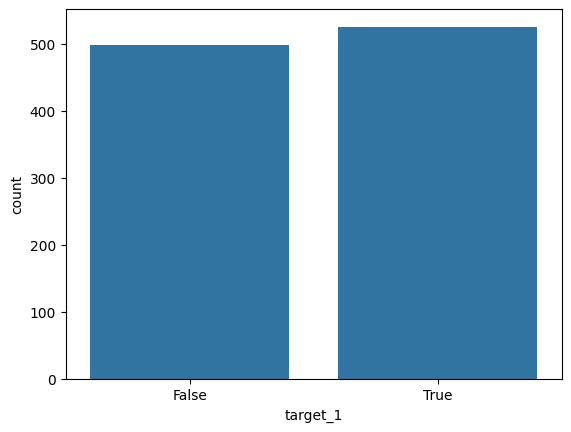

In [8]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['target_1'].value_counts())
sns.countplot(data=df_obj, x='target_1')
df_obj.head()

In [9]:
attr = df_obj.drop('target_1', axis=1)
target = df_obj['target_1']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [11]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[146   6]
 [  3 153]]
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       152
        True       0.96      0.98      0.97       156

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);